# Spaceship Titanic

Bu proje,uzayda bir gemide meydana gelen bir felaket sonrası, yolcuların hayatta kalma olasılıklarını tahmin etmeye yönelik bir makine öğrenimi problemidir.

## Veri Seti

Veri seti, yolcuların özelliklerini ve hayatta kalma durumlarını içermektedir. Yarışmada, bu verileri kullanarak yolcuların hayatta kalma olasılıklarını tahmin eden bir model geliştirmemiz beklenmektedir.

### Yarışma Linki

Daha fazla bilgi ve veri setine erişim için lütfen [bu bağlantıya](https://www.kaggle.com/competitions/spaceship-titanic/) tıklayın.

## Proje Adımları

1. **Veri Ön İşleme**: Verilerin incelenmesi ve temizlenmesi.
2. **Keşifsel Veri Analizi (EDA)**: Verilerin görselleştirilmesi ve analiz edilmesi.
3. **Model Geliştirme**: Farklı makine öğrenimi modellerinin uygulanması.
4. **Model Değerlendirme**: Modellerin performanslarının değerlendirilmesi.
5. **Sonuçların Raporlanması**: Elde edilen sonuçların ve önerilerin raporlanması.

Bu proje, veri bilimi ve makine öğrenimi konularında yetkinlik kazanmayı hedeflemektedir.


| Özellik        | Açıklama                                   | Veri Tipi  |
|----------------|--------------------------------------------|------------|
| PassengerId    | Benzersiz yolcu kimliği                    | String     |
| HomePlanet     | Yolcunun gezegeni (Europa, Earth, Mars)   | Kategorik  |
| CryoSleep      | Kriyojenik uyku durumu                     | Boolean    |
| Cabin          | Kabin numarası (Örnek: G/3/S)              | String     |
| Destination    | Hedef gezegen                              | Kategorik  |
| Age            | Yolcunun yaşı                              | Numeric    |
| VIP            | VIP statüsü                                | Boolean    |
| RoomService    | Oda servisi harcamaları                    | Numeric    |
| FoodCourt      | Yemek alanı harcamaları                    | Numeric    |
| ShoppingMall   | Alışveriş merkezi harcamaları              | Numeric    |
| Spa            | Spa harcamaları                            | Numeric    |
| VRDeck         | VR deck harcamaları                        | Numeric    |
| Transported    | Hedef değişken (Hayatta kalma durumu)    | Boolean    |

## Kütüphanelerin İçe Aktarılması

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## Veri Setinin Yüklenmesi

In [6]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [8]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [10]:
train_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

#### Cabin Bilgilerinin Ayrıştırılması

In [5]:
def split_cabin(df):
    df['Deck'] = df['Cabin'].apply(lambda x: x.split('/')[0] if isinstance(x, str) else np.nan)
    df['Num'] = df['Cabin'].apply(lambda x: x.split('/')[1] if isinstance(x, str) else np.nan)
    df['Side'] = df['Cabin'].apply(lambda x: x.split('/')[2] if isinstance(x, str) else np.nan)
    return df

train_data = split_cabin(train_data)
test_data = split_cabin(test_data)

#### Harcama Bilgilerinin Hesaplanması

In [6]:
expenses = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
train_data['TotalSpend'] = train_data[expenses].sum(axis=1)
test_data['TotalSpend'] = test_data[expenses].sum(axis=1)

#### Verilerin Ön İşlenmesi

In [9]:
categorical_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']
numerical_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalSpend']

In [11]:
# Sayısal değişkenler için işlemler
numerical_transformer = SimpleImputer(strategy='median')

# Kategorik değişkenler için işlemler
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Ön işlemeyi birleştirme
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


#### Modelin Oluşturulması ve Eğitilmesi

In [ ]:
# Modeli pipeline'a ekleme
model = RandomForestClassifier(n_estimators=100, random_state=42)
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)])

In [13]:
X = train_data.drop(['Transported', 'PassengerId', 'Name', 'Cabin', 'Num'], axis=1)
y = train_data['Transported']

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
clf.fit(X_train, y_train)
preds = clf.predict(X_valid)
print(f"Doğruluk Skoru: {accuracy_score(y_valid, preds)}")

Doğruluk Skoru: 0.7826336975273146


#### Tahminlerin Yapılması ve Sonuçların Kaydedilmesi

In [18]:
test_X = test_data.drop(['PassengerId', 'Name', 'Cabin', 'Num'], axis=1)
test_preds = clf.predict(test_X)

# Submission dosyasını oluşturma
output = pd.DataFrame({'PassengerId': test_data['PassengerId'],
                       'Transported': test_preds})
output.to_csv('submission.csv', index=False)

#### Görselleştirme

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

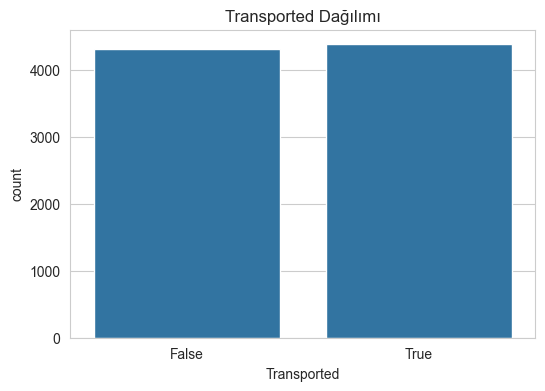

In [29]:
plt.figure(figsize=(6,4))
sns.countplot(x='Transported', data=train_data)
plt.title('Transported Dağılımı')
plt.show()

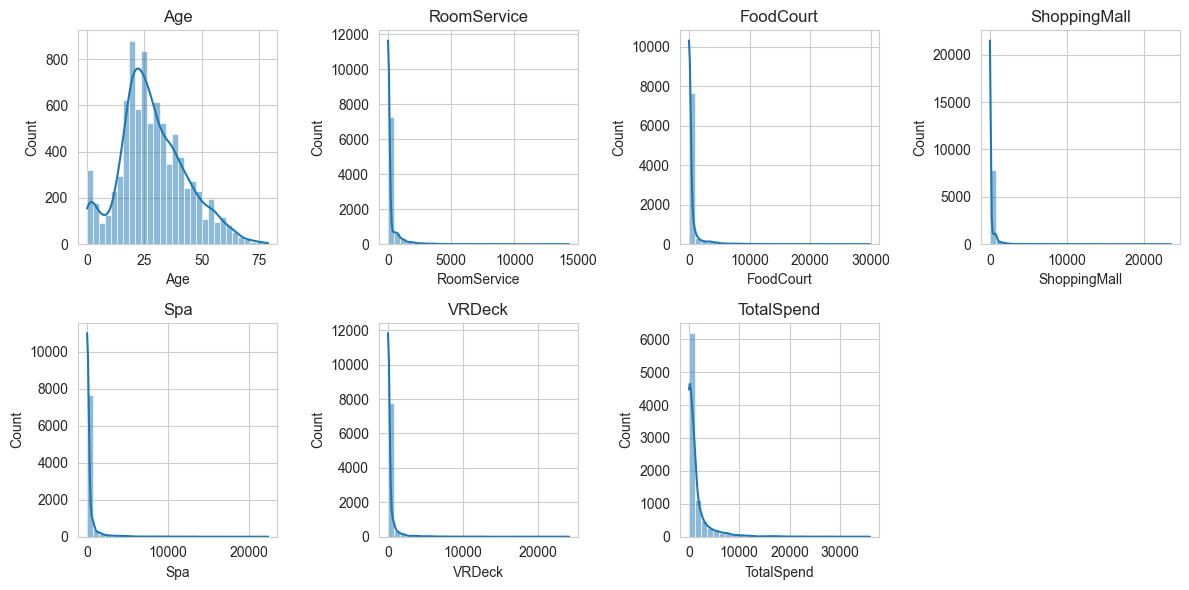

In [33]:
plt.figure(figsize=(12,6))
for i, col in enumerate(numerical_cols):
    plt.subplot(2,4,i+1)
    sns.histplot(train_data[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

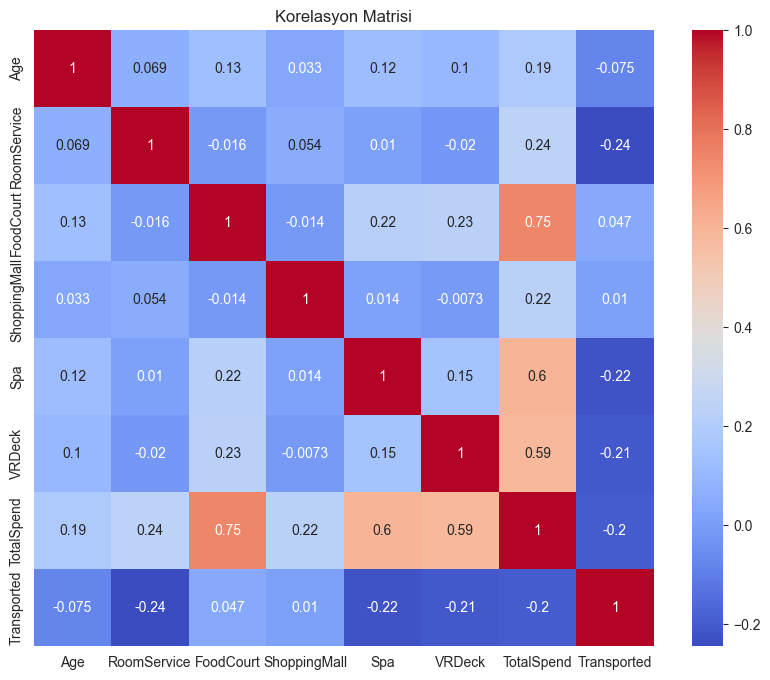

In [38]:
plt.figure(figsize=(10,8))
corr_matrix = train_data[numerical_cols + ['Transported']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasyon Matrisi')
plt.show()

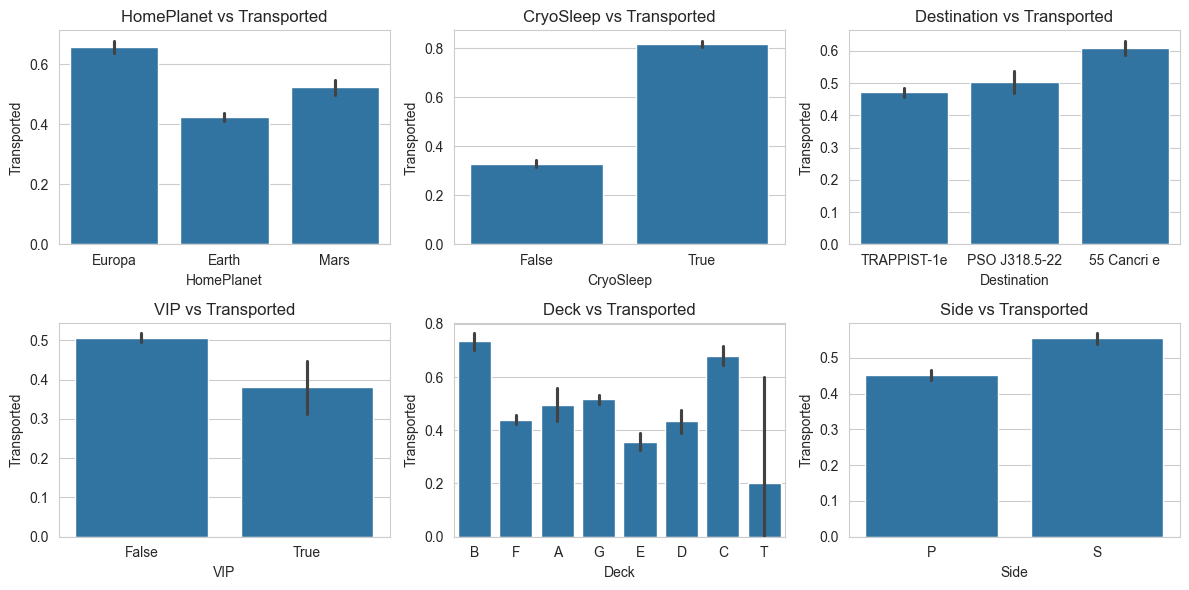

In [43]:
plt.figure(figsize=(12,6))
for i, col in enumerate(categorical_cols):
    plt.subplot(2,3,i+1)
    sns.barplot(x=col, y='Transported', data=train_data)
    plt.title(f'{col} vs Transported')
plt.tight_layout()
plt.show()

#### Modelin Optimize Edilmesi

In [48]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10],
    'model__min_samples_split': [2, 5]
}

grid_search = GridSearchCV(clf, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("En iyi parametreler:", grid_search.best_params_)
print("En iyi skor:", grid_search.best_score_)

En iyi parametreler: {'model__max_depth': 10, 'model__min_samples_split': 2, 'model__n_estimators': 200}
En iyi skor: 0.8011216566005177


#### Özelliklerin Önemlilik Analizi

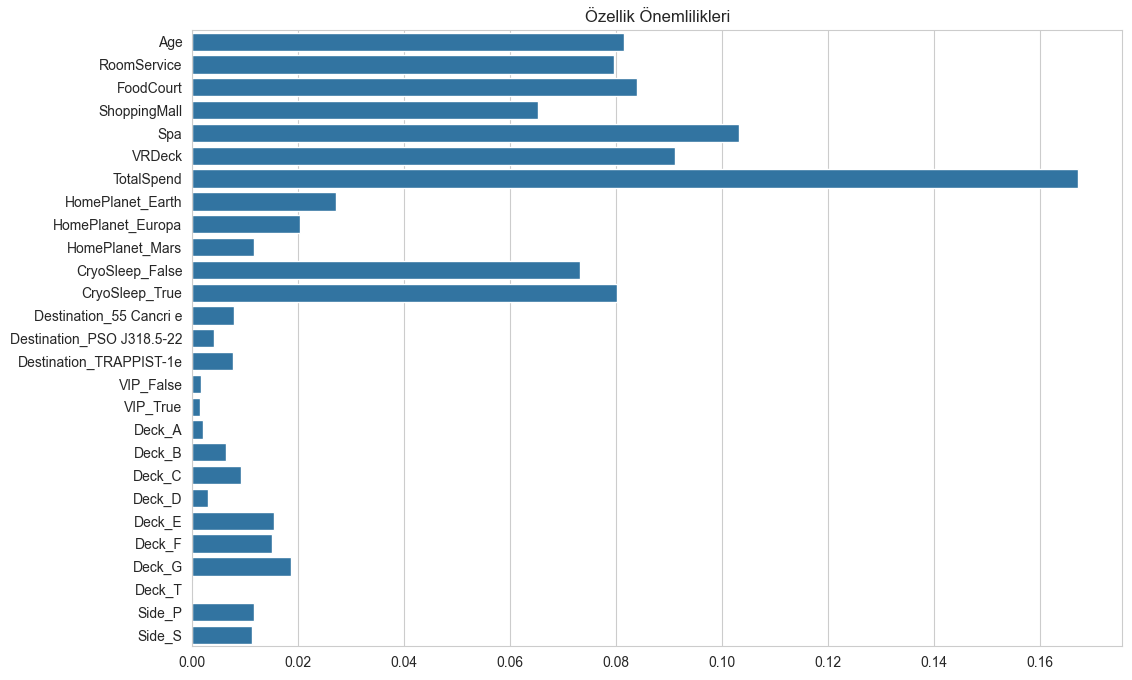

In [52]:
# Modeli yeniden eğitelim
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Özellik önemlilikleri
feature_importances = best_model.named_steps['model'].feature_importances_

# OneHotEncoder'dan özellik isimlerini al
ohe_columns = best_model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols)
all_features = numerical_cols + list(ohe_columns)

# Görselleştirme
plt.figure(figsize=(12,8))
sns.barplot(x=feature_importances, y=all_features)
plt.title('Özellik Önemlilikleri')
plt.show()

In [53]:
train_data['AgeGroup'] = pd.cut(train_data['Age'], 
                               bins=[0,12,18,60,100], 
                               labels=['Child','Teen','Adult','Senior'])
test_data['AgeGroup'] = pd.cut(test_data['Age'], 
                              bins=[0,12,18,60,100], 
                              labels=['Child','Teen','Adult','Senior'])

In [57]:
train_data['FamilySize'] = train_data['PassengerId'].apply(lambda x: int(x.split('_')[1]))
test_data['FamilySize'] = test_data['PassengerId'].apply(lambda x: int(x.split('_')[1]))

In [64]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Skorları: {scores}")
print(f"Ortalama Skor: {scores.mean():.4f}")

Cross-Validation Skorları: [0.77918344 0.78493387 0.8079356  0.81588032 0.80034522]
Ortalama Skor: 0.7977


In [68]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
xgb_clf = Pipeline(steps=[('preprocessor', preprocessor),
                         ('model', xgb_model)])

xgb_clf.fit(X_train, y_train)
xgb_preds = xgb_clf.predict(X_valid)
print(f"XGBoost Doğruluk: {accuracy_score(y_valid, xgb_preds):.4f}")

XGBoost Doğruluk: 0.7976


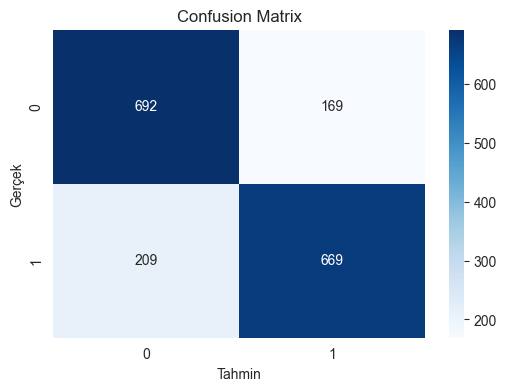

In [75]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_valid, preds)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Tahmin')
plt.ylabel('Gerçek')
plt.title('Confusion Matrix')
plt.show()

Bu projede, modelimiz ile Kaggle'daki Spaceship Titanic yarışmasında 0.78863 doğruluk skoru elde ettik. Bu sonuç, modelimizin yolcuların hayatta kalma olasılıklarını doğru bir şekilde tahmin etme yeteneğini göstermektedir. Ayrıca, çeşitli makine öğrenimi yöntemleri ve özellik mühendisliği teknikleri kullanarak modelimizi daha da geliştirme fırsatına sahip olduk.